## Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
from scipy.io import loadmat
import tensorflow as tf
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory

/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/envp6/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Données

In [2]:
file_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/file_list.mat')
file_lists = file_list['file_list']
annotation_list = file_list['annotation_list']
labels = file_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_lists]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_file_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_file_list.tail()

Image Path  \
20575  n02116738-African_hunting_dog/n02116738_9798.jpg   
20576  n02116738-African_hunting_dog/n02116738_9818.jpg   
20577  n02116738-African_hunting_dog/n02116738_9829.jpg   
20578  n02116738-African_hunting_dog/n02116738_9844.jpg   
20579  n02116738-African_hunting_dog/n02116738_9924.jpg   

                                         Annotation  Label  
20575  n02116738-African_hunting_dog/n02116738_9798    120  
20576  n02116738-African_hunting_dog/n02116738_9818    120  
20577  n02116738-African_hunting_dog/n02116738_9829    120  
20578  n02116738-African_hunting_dog/n02116738_9844    120  
20579  n02116738-African_hunting_dog/n02116738_9924    120

In [3]:
df_file_list.shape

(20580, 3)

In [4]:
df_file_list.value_counts('Label')

Label
3      252
10     239
27     232
108    219
89     218
      ... 
71     150
101    150
83     150
4      149
18     148
Name: count, Length: 120, dtype: int64

In [5]:
df_file_list['Label']

0          1
1          1
2          1
3          1
4          1
        ... 
20575    120
20576    120
20577    120
20578    120
20579    120
Name: Label, Length: 20580, dtype: uint8

In [6]:
train_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/train_list.mat')
file_list = train_list['file_list']
annotation_list = train_list['annotation_list']
labels = train_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_train_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_train_list.head()

Image Path  \
0   n02085620-Chihuahua/n02085620_5927.jpg   
1   n02085620-Chihuahua/n02085620_4441.jpg   
2   n02085620-Chihuahua/n02085620_1502.jpg   
3   n02085620-Chihuahua/n02085620_1916.jpg   
4  n02085620-Chihuahua/n02085620_13151.jpg   

                            Annotation  Label  
0   n02085620-Chihuahua/n02085620_5927      1  
1   n02085620-Chihuahua/n02085620_4441      1  
2   n02085620-Chihuahua/n02085620_1502      1  
3   n02085620-Chihuahua/n02085620_1916      1  
4  n02085620-Chihuahua/n02085620_13151      1

In [7]:
df_train_list.shape

(12000, 3)

In [8]:
train_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/train_data.mat')
train_info = train_data['train_info']
# annotation_list = train_data['train_fg_data']
# labels = train_data['train_data']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in train_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in train_info['annotation_list'][0][0]]
labels = [label[0] for label in train_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in train_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_train_data = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Afficher le DataFrame
df_train_data.head()

Image Path  \
0   n02085620-Chihuahua/n02085620_5927.jpg   
1   n02085620-Chihuahua/n02085620_4441.jpg   
2   n02085620-Chihuahua/n02085620_1502.jpg   
3   n02085620-Chihuahua/n02085620_1916.jpg   
4  n02085620-Chihuahua/n02085620_13151.jpg   

                            Annotation  Label  \
0   n02085620-Chihuahua/n02085620_5927      1   
1   n02085620-Chihuahua/n02085620_4441      1   
2   n02085620-Chihuahua/n02085620_1502      1   
3   n02085620-Chihuahua/n02085620_1916      1   
4  n02085620-Chihuahua/n02085620_13151      1   

                                               FG ID  
0  histograms_spm/n02085620-Chihuahua/n02085620_5...  
1  histograms_spm/n02085620-Chihuahua/n02085620_4...  
2  histograms_spm/n02085620-Chihuahua/n02085620_1...  
3  histograms_spm/n02085620-Chihuahua/n02085620_1...  
4  histograms_spm/n02085620-Chihuahua/n02085620_1...

In [9]:
df_train_data.shape

(12000, 4)

In [10]:
test_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/test_list.mat')
file_list = test_list['file_list']
annotation_list = test_list['annotation_list']
labels = test_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_test_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_test_list.head()

Image Path                          Annotation  \
0  n02085620-Chihuahua/n02085620_2650.jpg  n02085620-Chihuahua/n02085620_2650   
1  n02085620-Chihuahua/n02085620_4919.jpg  n02085620-Chihuahua/n02085620_4919   
2  n02085620-Chihuahua/n02085620_1765.jpg  n02085620-Chihuahua/n02085620_1765   
3  n02085620-Chihuahua/n02085620_3006.jpg  n02085620-Chihuahua/n02085620_3006   
4  n02085620-Chihuahua/n02085620_1492.jpg  n02085620-Chihuahua/n02085620_1492   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1

In [11]:
df_test_list.shape

(8580, 3)

In [12]:
test_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/test_data.mat')
test_info = test_data['test_info']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in test_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in test_info['annotation_list'][0][0]]
labels = [label[0] for label in test_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in test_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_test_info = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Affichage du DataFrame
df_test_info.head()

Image Path                          Annotation  \
0  n02085620-Chihuahua/n02085620_2650.jpg  n02085620-Chihuahua/n02085620_2650   
1  n02085620-Chihuahua/n02085620_4919.jpg  n02085620-Chihuahua/n02085620_4919   
2  n02085620-Chihuahua/n02085620_1765.jpg  n02085620-Chihuahua/n02085620_1765   
3  n02085620-Chihuahua/n02085620_3006.jpg  n02085620-Chihuahua/n02085620_3006   
4  n02085620-Chihuahua/n02085620_1492.jpg  n02085620-Chihuahua/n02085620_1492   

   Label                                              FG ID  
0      1  histograms_spm/n02085620-Chihuahua/n02085620_2...  
1      1  histograms_spm/n02085620-Chihuahua/n02085620_4...  
2      1  histograms_spm/n02085620-Chihuahua/n02085620_1...  
3      1  histograms_spm/n02085620-Chihuahua/n02085620_3...  
4      1  histograms_spm/n02085620-Chihuahua/n02085620_1...

In [13]:
df_test_info.shape

(8580, 4)

In [14]:
base_dir = '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/'  # Le répertoire contenant les images

# Parcourir les chemins des images et les charger
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    image = Image.open(full_path)
    #image.show()  # Afficher l'image

In [15]:
len(df_file_list['Label'])

20580

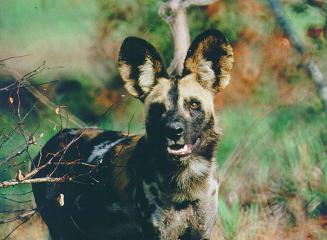

In [16]:
image

## Preprocessing des images

In [17]:

def preprocess_image(image_path, target_size=(224, 224)):
    # Chargement de l'image avec OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image non trouvée à {image_path}")
        return None

    # Conversion de l'image en RGB pour les traitements ultérieurs
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Étape 1 : Blanchiment (centrage) avec TensorFlow
    image = tf.image.convert_image_dtype(img, tf.float32)  # Convertit l'image en flottant [0, 1]
    image_whitened = tf.image.per_image_standardization(image)  # Applique le blanchiment

    # Conversion de l'image blanchie en tableau NumPy compatible avec OpenCV
    img_whitened_np = image_whitened.numpy()

    # Étape 2 : Égalisation de l'histogramme sur les niveaux de gris
    img_gray = cv2.cvtColor((img_whitened_np * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    img_equalized = cv2.equalizeHist(img_gray)

    # Étape 3 : Redimensionnement
    img_resized = cv2.resize(img_equalized, target_size)

    # Ajout de la dimension de canal (1 pour niveaux de gris ou 3 pour RGB)
    img_final = np.expand_dims(img_resized, axis=-1)  # (224, 224, 1)

    return img_final

In [18]:
# Appliquer le prétraitement à chaque image
preprocessed_images = []
for path in df_file_list['Image Path']:
    full_path = os.path.join('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/', path)
    preprocessed_img = preprocess_image(full_path, target_size=(224, 224))
    if preprocessed_img is not None:
        preprocessed_images.append(preprocessed_img)
    else:
        print(f"Image non traitée : {full_path}")

# Optionnel : Affichage des informations
print("Prétraitement terminé pour toutes les images.")
df_file_list.head()

Prétraitement terminé pour toutes les images.


Image Path  \
0  n02085620-Chihuahua/n02085620_10074.jpg   
1  n02085620-Chihuahua/n02085620_10131.jpg   
2  n02085620-Chihuahua/n02085620_10621.jpg   
3   n02085620-Chihuahua/n02085620_1073.jpg   
4  n02085620-Chihuahua/n02085620_10976.jpg   

                            Annotation  Label  
0  n02085620-Chihuahua/n02085620_10074      1  
1  n02085620-Chihuahua/n02085620_10131      1  
2  n02085620-Chihuahua/n02085620_10621      1  
3   n02085620-Chihuahua/n02085620_1073      1  
4  n02085620-Chihuahua/n02085620_10976      1

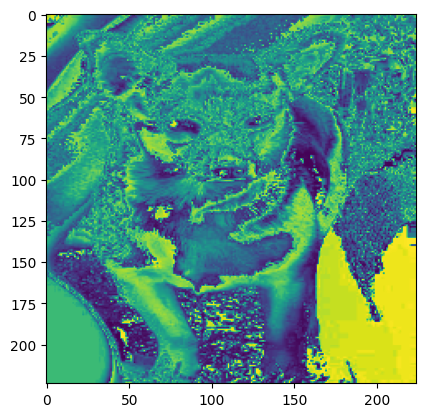

In [19]:
plt.imshow(preprocessed_images[0])

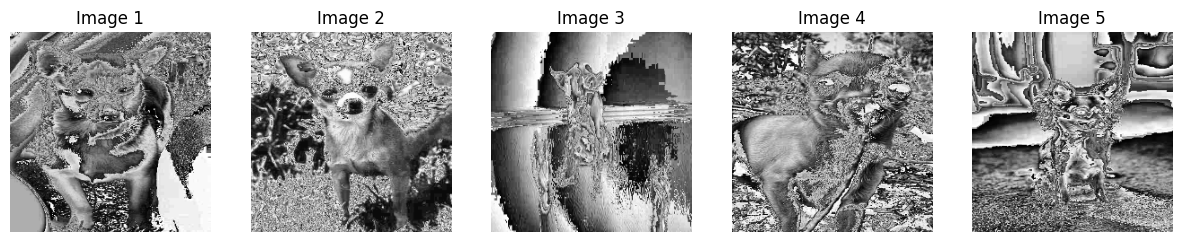

In [ ]:
# Affichage des 5 premières images prétraitées
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(preprocessed_images[i], cmap='gray')  # Utilisez cmap='gray' si les images sont en niveaux de gris
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()

## Sélection des classes

Je ne prends que 3 classes:
- Maltese_dog : classe 3
- Afghan_hound : classe 10
- Scottish_deerhound : classe 27

In [21]:
# Filtrer pour ne garder que les lignes avec les labels 3, 10, ou 27
filtered_df = df_file_list[df_file_list['Label'].isin([3, 10, 27])]

filtered_df.shape

(723, 3)

In [22]:
df_by_label = filtered_df.groupby('Label').head(1)
# Afficher les chemins des images et les annotations pour les labels filtrés
for index, row in df_by_label.iterrows():
    print(f"Image Path: {row['Image Path']}, Annotation (Label): {row['Label']}")

Image Path: n02085936-Maltese_dog/n02085936_10073.jpg, Annotation (Label): 3
Image Path: n02088094-Afghan_hound/n02088094_1003.jpg, Annotation (Label): 10
Image Path: n02092002-Scottish_deerhound/n02092002_10060.jpg, Annotation (Label): 27


In [23]:
labels = df_by_label['Label'].unique().tolist()
labels

[3, 10, 27]

In [24]:
# Appliquer le prétraitement à chaque image
preprocessed_images = []
for path in filtered_df['Image Path']:
    full_path = os.path.join('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/', path)
    preprocessed_img = preprocess_image(full_path, target_size=(224, 224))
    if preprocessed_img is not None:
        preprocessed_images.append(preprocessed_img)
    else:
        print(f"Image non traitée : {full_path}")

# Optionnel : Affichage des informations
print("Prétraitement terminé pour toutes les images.")
filtered_df.head()

Prétraitement terminé pour toutes les images.


Image Path  \
337  n02085936-Maltese_dog/n02085936_10073.jpg   
338  n02085936-Maltese_dog/n02085936_10130.jpg   
339  n02085936-Maltese_dog/n02085936_10148.jpg   
340  n02085936-Maltese_dog/n02085936_10197.jpg   
341  n02085936-Maltese_dog/n02085936_10199.jpg   

                                Annotation  Label  
337  n02085936-Maltese_dog/n02085936_10073      3  
338  n02085936-Maltese_dog/n02085936_10130      3  
339  n02085936-Maltese_dog/n02085936_10148      3  
340  n02085936-Maltese_dog/n02085936_10197      3  
341  n02085936-Maltese_dog/n02085936_10199      3

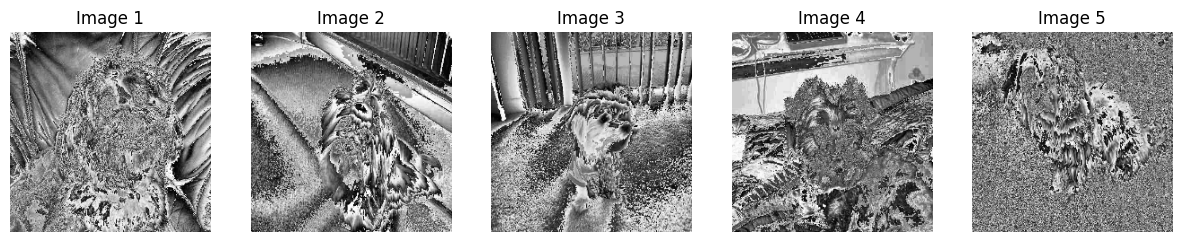

In [25]:
# Affichage des 5 premières images prétraitées
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(preprocessed_images[i], cmap='gray')  # Utilisez cmap='gray' si les images sont en niveaux de gris
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()

## Prétraitement des données

### Chargement des données

In [ ]:
num_classes = 3

resnet_weights_path = 'imagenet'
#vgg16_weights_path = 'imagenet'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
#my_new_model.add(VGG16(include_top=False, pooling='avg', weights=vgg16_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

## Compile the Model

In [27]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
my_new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Data Generation and Pre-Processing

In [ ]:
image_size = 160
batch_size = 32

data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # 20% des données pour la validation
)

train_generator = data_generator.flow_from_directory(
    '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Défini comme ensemble d'entraînement
)

validation_generator = data_generator.flow_from_directory(
    '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Défini comme ensemble de validation
)

Found 580 images belonging to 3 classes.
Found 143 images belonging to 3 classes.


In [ ]:
# Charger les données
image_size = 160
batch_size = 32
dataset = image_dataset_from_directory(
    '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/',
    image_size=(image_size, image_size),
    batch_size=batch_size,
    label_mode='categorical'
)

# Convertir en listes de numpy arrays
images = []
labels = []

for img, label in dataset:
    images.append(img.numpy())
    labels.append(label.numpy())

# Convertir les listes en numpy arrays
images = np.concatenate(images)
labels = np.concatenate(labels)

# Diviser les données en ensembles d'entraînement, validation et test
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reconvertir en objets tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Affichage des résultats
print(f"Train dataset: {len(train_dataset)} batches")
print(f"Validation dataset: {len(validation_dataset)} batches")
print(f"Test dataset: {len(test_dataset)} batches")

Found 723 files belonging to 3 classes.
Train dataset: 19 batches
Validation dataset: 3 batches
Test dataset: 3 batches


2024-11-22 17:04:06.517876: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Fit Model

In [31]:
start_time_fit = time.time() # en secondes
my_new_model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=3)
time_fit = (time.time() - start_time_fit)


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/envp6/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.7535 - loss: 0.7991 - val_accuracy: 0.9583 - val_loss: 0.1228
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 0.9855 - loss: 0.0589 - val_accuracy: 0.9574 - val_loss: 0.1608
Epoch 3/15


2024-11-22 17:04:23.221979: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.9851 - loss: 0.0463 - val_accuracy: 0.9062 - val_loss: 0.1993
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - accuracy: 0.9706 - loss: 0.0553 - val_accuracy: 0.9362 - val_loss: 0.1434
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.9988 - loss: 0.0242 - val_accuracy: 0.9479 - val_loss: 0.1211
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.9983 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 7/15


2024-11-22 17:04:50.687894: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 0.9896 - val_loss: 0.0307
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.9998 - loss: 0.0152 - val_accuracy: 0.9574 - val_loss: 0.0919
Epoch 9/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 1.0000 - loss: 0.0150 - val_accuracy: 0.9479 - val_loss: 0.1090
Epoch 10/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.9787 - val_loss: 0.0473
Epoch 11/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9688 - val_loss: 0.0852
Epoch 12/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 0.9787 - val_loss: 0.0385
Epoch 13/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.9792 - val_loss: 0.0605
Epoch 14/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.9787 -

2024-11-22 17:05:44.725696: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.9792 - val_loss: 0.0720


## Prédictions

In [32]:
start_time_test = time.time() # en secondes
test_loss, test_accuracy = my_new_model.evaluate(test_dataset)
time_test = (time.time() - start_time_test)

print('Test accuracy :', test_accuracy)
print('Test loss :', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.9609 - loss: 0.1378
Test accuracy : 0.9452054500579834
Test loss : 0.1619412899017334


In [33]:
print("Temps d'entraînement:", time_fit)
print("Temps de test:", time_test)

Temps d'entraînement: 104.97374272346497
Temps de test: 0.7763009071350098


Probabilités par classe :
 [[0.43858135 0.32957578 0.23184285]
 [0.25008595 0.45735842 0.29255557]
 [0.24107935 0.53791934 0.2210013 ]
 [0.21221066 0.57512474 0.2126646 ]
 [0.21375884 0.5737437  0.21249747]
 [0.24088244 0.4983139  0.2608037 ]
 [0.54659724 0.23421906 0.21918364]
 [0.21201834 0.21221727 0.5757644 ]
 [0.21202065 0.21222481 0.5757546 ]
 [0.2346599  0.4123996  0.35294053]
 [0.2119483  0.21196179 0.57608986]
 [0.21224761 0.21307768 0.5746747 ]
 [0.21194912 0.2119575  0.57609344]
 [0.22013144 0.5566051  0.22326346]
 [0.5759104  0.21209353 0.21199608]
 [0.220912   0.23612222 0.5429657 ]
 [0.22937998 0.5429139  0.22770612]
 [0.21194257 0.21194267 0.5761147 ]
 [0.21205021 0.21226618 0.57568365]
 [0.21412127 0.2125635  0.5733152 ]
 [0.21955165 0.24381712 0.5366312 ]
 [0.21362156 0.21248995 0.5738885 ]
 [0.2119435  0.21194658 0.5761099 ]
 [0.21258602 0.2141358  0.5732782 ]
 [0.57611686 0.2119416  0.21194157]
 [0.57541627 0.21249336 0.21209045]
 [0.5758648  0.21205924 0.21207596]
 

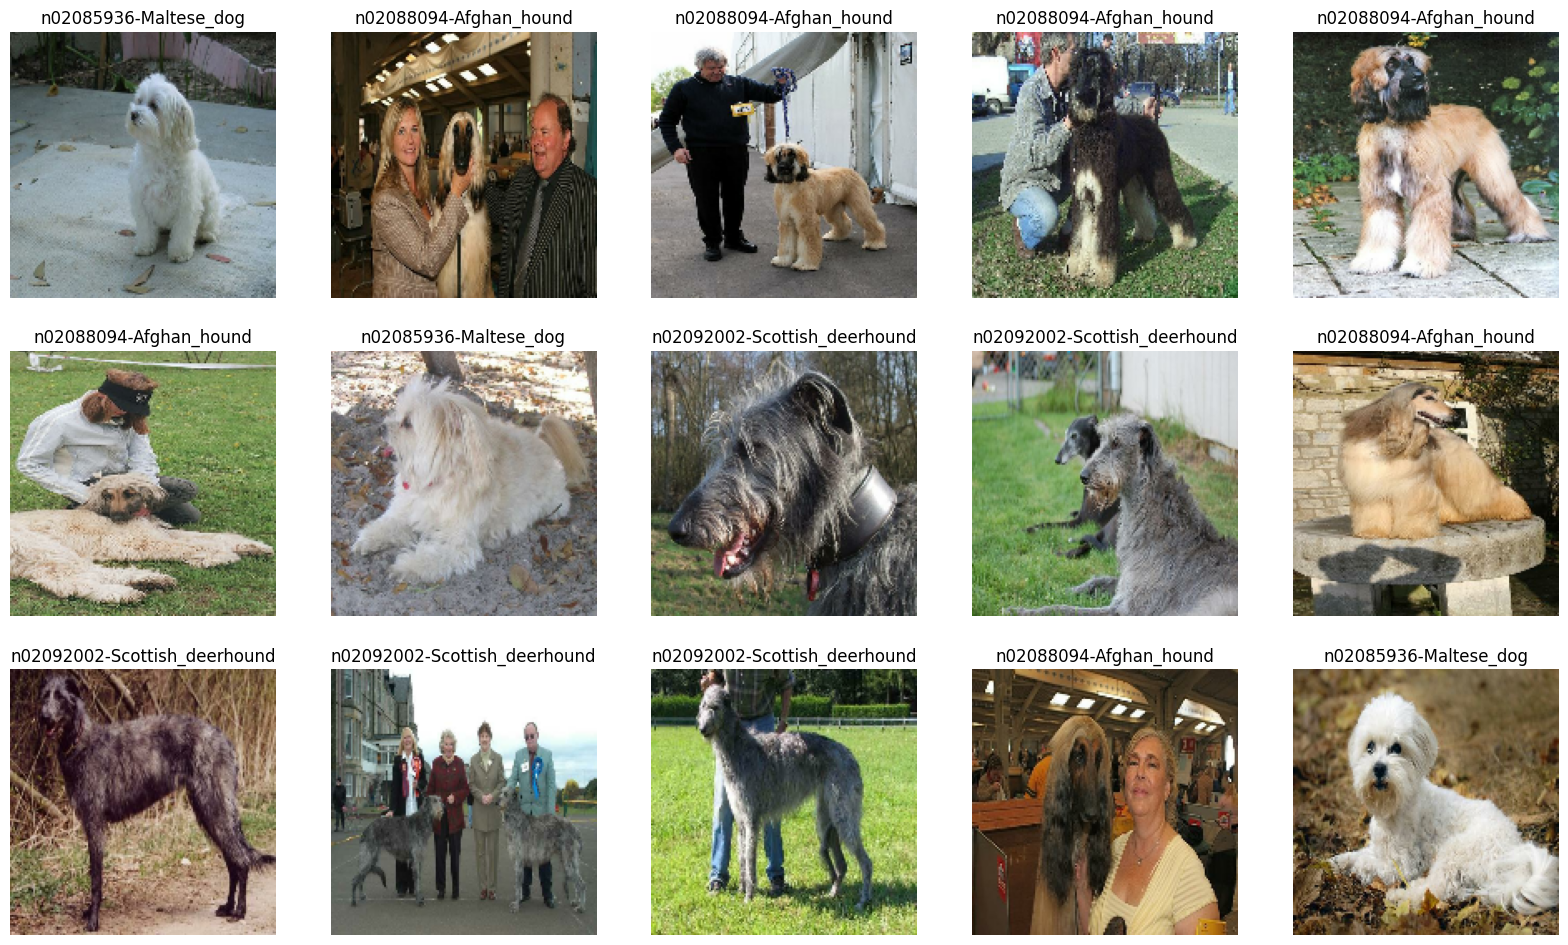

In [ ]:
# Récupérer un lot d'images du jeu de test
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

# Prédictions de votre modèle sur le lot d'images
predictions = my_new_model.predict_on_batch(image_batch)

# Appliquer la fonction softmax pour convertir les logits en probabilités
probabilities = tf.nn.softmax(predictions, axis=-1)

# Pour une classification multi-classe, utilisez `argmax` pour obtenir l'indice de la classe prédite
predictions = tf.argmax(predictions, axis=-1)  # La classe avec la probabilité la plus élevée

print('Probabilités par classe :\n', probabilities.numpy())
print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

# Accéder aux noms des classes depuis le générateur d'entraînement
class_names = list(train_generator.class_indices.keys())  # Obtenir les noms des classes à partir des indices

# Affichage des images avec leurs prédictions
plt.figure(figsize=(20, 20))
for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))

    # Récupérer l'indice de la classe prédite pour chaque image
    class_index = predictions[i].numpy()  # L'indice de la classe prédite
    plt.title(class_names[class_index])  # Afficher le nom de la classe prédite
    plt.axis("off")

plt.show()

In [ ]:
# Sauvegarder le modèle dans un fichier .h5
my_new_model.save('dog_breed_resnet.h5')